# Clustering Using Customer Transactions Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
all_retail_df = pd.read_excel("https://raw.githubusercontent.com/manaranjanp/ISB_MLUL/main/clustering/Online_Retail.xlsx")

In [3]:
all_retail_df.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [4]:
retail_df = all_retail_df[all_retail_df.Country == 'France']

In [5]:
retail_df.Country.value_counts()

Country
France    8557
Name: count, dtype: int64

In [6]:
retail_df.shape

(8557, 8)

In [7]:
retail_df.info();

<class 'pandas.core.frame.DataFrame'>
Index: 8557 entries, 26 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8557 non-null   object        
 1   StockCode    8557 non-null   object        
 2   Description  8557 non-null   object        
 3   Quantity     8557 non-null   int64         
 4   InvoiceDate  8557 non-null   datetime64[ns]
 5   UnitPrice    8557 non-null   float64       
 6   CustomerID   8491 non-null   float64       
 7   Country      8557 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 601.7+ KB


In [8]:
retail_df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID     66
Country         0
dtype: int64

In [9]:
retail_df.dropna( subset = ['CustomerID'], inplace = True)

In [10]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8491 entries, 26 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8491 non-null   object        
 1   StockCode    8491 non-null   object        
 2   Description  8491 non-null   object        
 3   Quantity     8491 non-null   int64         
 4   InvoiceDate  8491 non-null   datetime64[ns]
 5   UnitPrice    8491 non-null   float64       
 6   CustomerID   8491 non-null   float64       
 7   Country      8491 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 597.0+ KB


In [11]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
retail_df.duplicated().sum()

16

In [13]:
retail_df.drop_duplicates(inplace = True)

In [14]:
retail_df.info();

<class 'pandas.core.frame.DataFrame'>
Index: 8475 entries, 26 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8475 non-null   object        
 1   StockCode    8475 non-null   object        
 2   Description  8475 non-null   object        
 3   Quantity     8475 non-null   int64         
 4   InvoiceDate  8475 non-null   datetime64[ns]
 5   UnitPrice    8475 non-null   float64       
 6   CustomerID   8475 non-null   float64       
 7   Country      8475 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 595.9+ KB


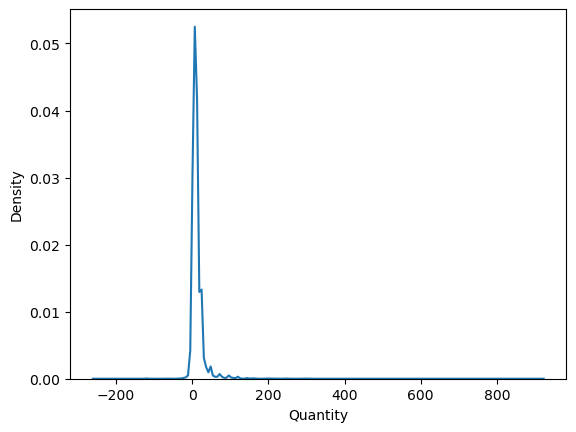

In [15]:
sn.kdeplot(retail_df.Quantity);

In [16]:
retail_df[retail_df.Quantity < 0][0:10]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
19802,C537893,22450,SILK PURSE BABUSHKA BLUE,-1,2010-12-09 10:14:00,3.35,12721.0,France
19803,C537893,22634,CHILDS BREAKFAST SET SPACEBOY,-2,2010-12-09 10:14:00,9.95,12721.0,France
19804,C537893,22630,DOLLY GIRL LUNCH BOX,-2,2010-12-09 10:14:00,1.95,12721.0,France
32695,C539104,22662,LUNCH BAG DOLLY GIRL DESIGN,-3,2010-12-16 10:38:00,1.65,12494.0,France
32751,C539114,22667,RECIPE BOX RETROSPOT,-3,2010-12-16 11:24:00,2.95,12494.0,France
43856,C540151,21843,RED RETROSPOT CAKE STAND,-1,2011-01-05 11:13:00,10.95,12494.0,France
44153,C540156,21843,RED RETROSPOT CAKE STAND,-1,2011-01-05 11:36:00,10.95,12683.0,France
46882,C540367,POST,POSTAGE,-3,2011-01-06 16:17:00,18.00,12413.0,France
54079,C540853,22634,CHILDS BREAKFAST SET SPACEBOY,-1,2011-01-12 09:52:00,9.95,12413.0,France
65078,C541688,22423,REGENCY CAKESTAND 3 TIER,-4,2011-01-20 16:15:00,10.95,12683.0,France


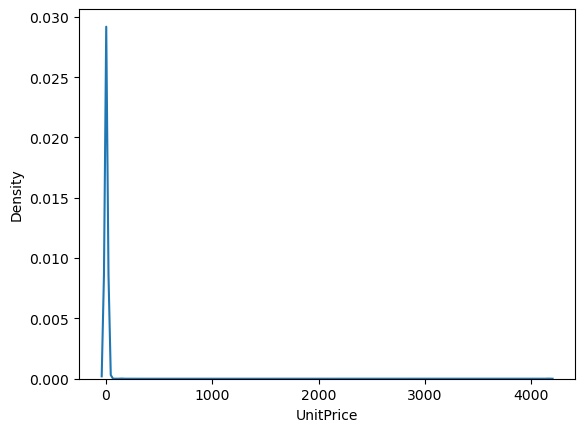

In [17]:
sn.kdeplot(retail_df.UnitPrice);

In [18]:
retail_df[retail_df.UnitPrice == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
436961,574252,M,Manual,1,2011-11-03 13:24:00,0.0,12437.0,France


In [19]:
retail_clean_df = retail_df[(retail_df.Quantity > 0) & (retail_df.UnitPrice > 0)]

In [20]:
retail_clean_df.info();

<class 'pandas.core.frame.DataFrame'>
Index: 8326 entries, 26 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8326 non-null   object        
 1   StockCode    8326 non-null   object        
 2   Description  8326 non-null   object        
 3   Quantity     8326 non-null   int64         
 4   InvoiceDate  8326 non-null   datetime64[ns]
 5   UnitPrice    8326 non-null   float64       
 6   CustomerID   8326 non-null   float64       
 7   Country      8326 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 585.4+ KB


In [21]:
retail_clean_df = retail_clean_df.reset_index(drop=True)

### StockCode Information

In [22]:
stock_df = retail_clean_df[['CustomerID', 'StockCode']]

In [23]:
stock_df.drop_duplicates(inplace = True)

In [24]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 8325
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  5637 non-null   float64
 1   StockCode   5637 non-null   object 
dtypes: float64(1), object(1)
memory usage: 132.1+ KB


In [25]:
len(stock_df.StockCode.unique())

1522

In [26]:
len(stock_df.CustomerID.unique())

87

In [27]:
stock_count_df = stock_df.StockCode.value_counts().reset_index()
stock_count_df.columns = ['StockCode', 'count']

In [28]:
stock_count_df = stock_count_df[stock_count_df['count'] > 10]
stock_count_df

,StockCode,count
0,POST,72
1,22554,29
2,23084,29
3,21212,28
4,22551,28
...,...,...
105,21914,11
106,22331,11
107,21883,11
108,22037,11


### Customer Information

In [29]:
cust_count_df = stock_df.CustomerID.value_counts().reset_index()
cust_count_df.columns = ['CustomerID', 'count']

In [30]:
cust_count_df[cust_count_df['count'] > 10]
cust_count_df

,CustomerID,count
0,12567.0,323
1,12681.0,267
2,12536.0,260
3,12714.0,216
4,12682.0,209
...,...,...
82,12509.0,7
83,12686.0,7
84,12659.0,5
85,12736.0,4


In [31]:
clean_stock_df = stock_df[stock_df.StockCode.isin(stock_count_df.StockCode.unique()) &
                          stock_df.CustomerID.isin(cust_count_df.CustomerID.unique())]

In [32]:
clean_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787 entries, 0 to 8325
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1787 non-null   float64
 1   StockCode   1787 non-null   object 
dtypes: float64(1), object(1)
memory usage: 41.9+ KB


In [33]:
clean_stock_df['bought'] = 1.0

In [34]:
clean_stock_df

,CustomerID,StockCode,bought
0,12583.0,22728,1.0
1,12583.0,22727,1.0
2,12583.0,22726,1.0
4,12583.0,21883,1.0
8,12583.0,22326,1.0
...,...,...,...
8292,12615.0,20682,1.0
8304,12615.0,22620,1.0
8311,12680.0,22631,1.0
8324,12680.0,23255,1.0


In [35]:
cust_stocks_df = clean_stock_df.pivot( index='StockCode', 
                                       columns='CustomerID', 
                                       values = "bought" )
cust_stocks_df[0:10]

CustomerID,12413.0,12437.0,12441.0,12488.0,12489.0,12490.0,12491.0,12493.0,12494.0,12506.0,...,12726.0,12727.0,12728.0,12729.0,12731.0,12732.0,12735.0,12736.0,12740.0,14277.0
StockCode,,,,,,,,,,,,,,,,,,,,,
20676,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
20682,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
20712,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20719,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
20724,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20725,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0
20726,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20749,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20750,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN


In [36]:
cust_stocks_df.shape

(110, 85)

In [37]:
cust_stocks_df = cust_stocks_df.fillna(0.0)
cust_stocks_df.sample(10)

CustomerID,12413.0,12437.0,12441.0,12488.0,12489.0,12490.0,12491.0,12493.0,12494.0,12506.0,...,12726.0,12727.0,12728.0,12729.0,12731.0,12732.0,12735.0,12736.0,12740.0,14277.0
StockCode,,,,,,,,,,,,,,,,,,,,,
23289,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22634,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
23209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23291,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23084,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23254,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
22899,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21914,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [38]:
from sklearn.metrics.pairwise import pairwise_distances

In [39]:
jaccard_distance = pairwise_distances(cust_stocks_df.values, metric="jaccard")

In [40]:
jaccard_distance

array([[0.        , 0.7826087 , 0.85714286, ..., 0.75      , 0.83333333,
        0.8630137 ],
       [0.7826087 , 0.        , 0.57142857, ..., 0.76      , 0.52173913,
        0.78082192],
       [0.85714286, 0.57142857, 0.        , ..., 0.77272727, 0.5       ,
        0.81944444],
       ...,
       [0.75      , 0.76      , 0.77272727, ..., 0.        , 0.76      ,
        0.80555556],
       [0.83333333, 0.52173913, 0.5       , ..., 0.76      , 0.        ,
        0.7972973 ],
       [0.8630137 , 0.78082192, 0.81944444, ..., 0.80555556, 0.7972973 ,
        0.        ]])

In [41]:
jaccard_distance.shape

(110, 110)

In [42]:
from sklearn.cluster import AgglomerativeClustering, HDBSCAN

In [43]:
h_cluster = HDBSCAN(min_cluster_size=2, metric = 'jaccard')

In [44]:
#h_cluster = AgglomerativeClustering(n_clusters = 4)

In [45]:
h_cluster.fit(cust_stocks_df)

HDBSCAN(metric='jaccard', min_cluster_size=2)

In [46]:
h_cluster.labels_

array([ 2, 18, 18,  8,  8, 18, 18, -1, -1, -1, 23, 23, 23, 21, 21,  4, -1,
       -1,  2, -1, 19, 19, -1, -1,  9, -1, -1, 22, 22, 22, 16, 16, -1, -1,
        0, -1, 20, 20, 14, 14, 17, 17, 19, -1, -1,  4, 18, 11, 11, 18, -1,
        7,  7, -1, 22, -1, 12, -1, 12, -1, 12,  0, -1, 15, 15, 15,  5,  5,
        1, -1,  8, -1, 10, 10, 10, -1, 20, -1, -1, 20, -1, -1, -1,  1, 18,
       13,  9, 18, 18, -1, 18, 18, 20, -1,  3,  3,  3,  6,  6,  6, 13, 13,
       13, -1, -1, -1, -1, -1, 18, -1])

In [47]:
stock_clusters = pd.DataFrame( { "StockCode" : cust_stocks_df.index,
                                 "ClusterID": h_cluster.labels_ } )

In [48]:
stock_clusters

,StockCode,ClusterID
0,20676,2
1,20682,18
2,20712,18
3,20719,8
4,20724,8
...,...,...
105,47566,-1
106,84375,-1
107,84997D,-1
108,85099B,18


In [49]:
stock_desc_dict = dict(zip(retail_df['StockCode'], retail_df['Description']))

In [50]:
stock_clusters['Description'] = stock_clusters.StockCode.map(lambda x: stock_desc_dict[x])

In [51]:
stock_clusters[stock_clusters.ClusterID == 0]

,StockCode,ClusterID,Description
34,22138,0,BAKING SET 9 PIECE RETROSPOT
61,22617,0,BAKING SET SPACEBOY DESIGN


In [52]:
stock_clusters[stock_clusters.ClusterID == 1]

,StockCode,ClusterID,Description
68,22636,1,CHILDS BREAKFAST SET CIRCUS PARADE
83,23076,1,ICE CREAM SUNDAE LIP GLOSS


In [53]:
stock_clusters[stock_clusters.ClusterID == 3]

,StockCode,ClusterID,Description
94,23254,3,CHILDRENS CUTLERY DOLLY GIRL
95,23255,3,CHILDRENS CUTLERY CIRCUS PARADE
96,23256,3,CHILDRENS CUTLERY SPACEBOY


In [54]:
stock_clusters[stock_clusters.ClusterID == 4]

,StockCode,ClusterID,Description
15,21156,4,RETROSPOT CHILDRENS APRON
45,22367,4,CHILDRENS APRON SPACEBOY DESIGN


In [55]:
stock_clusters[stock_clusters.ClusterID == 5]

,StockCode,ClusterID,Description
66,22634,5,CHILDS BREAKFAST SET SPACEBOY
67,22635,5,CHILDS BREAKFAST SET DOLLY GIRL


In [56]:
stock_clusters[stock_clusters.ClusterID != -1].sort_values("ClusterID")[-20:]

,StockCode,ClusterID,Description
46,22382,18,LUNCH BAG SPACEBOY DESIGN
2,20712,18,JUMBO BAG WOODLAND ANIMALS
6,20726,18,LUNCH BAG WOODLAND
20,21559,19,STRAWBERRY LUNCH BOX WITH CUTLERY
21,21731,19,RED TOADSTOOL LED NIGHT LIGHT
42,22352,19,LUNCH BOX WITH CUTLERY RETROSPOT
76,22895,20,SET OF 2 TEA TOWELS APPLE AND PEARS
79,22908,20,PACK OF 20 NAPKINS RED APPLES
92,23238,20,SET OF 4 KNICK KNACK TINS LONDON
37,22303,20,COFFEE MUG APPLES DESIGN
